In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import peakutils
from util.FreqReader import read_freq_from_clear_file
from util.DoubleAnharmonicity import DoubleAnharmonicity


plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200

In [3]:
adamantane_glycine_zw = read_freq_from_clear_file("glycine/adamantan-glycine-zw_freq_1_ir.txt")
adamantane_duo_glycine_zw = read_freq_from_clear_file("glycine/adamant_2zw_true_freq_ir.txt")
adamantane_glycine_zw_water = read_freq_from_clear_file("glycine/adamantane_zw_gly_water_ir.txt")
e_adamantane = read_freq_from_clear_file("glycine/ND-COOH-1-1.CSV")
e_adamantane_glycine = read_freq_from_clear_file("glycine/ND-COOH+Gly 1к1 liofilization смесь.CSV")
e_gly_fluka = read_freq_from_clear_file("glycine/Глицин Fluka.CSV")





In [4]:
def do_anharmonism_correction(x, coef1, coef2):
    if 1000 < x < 2000:
       return x * coef1
    elif 2000 < x:
      return x * coef2

In [5]:
def plot_all_ultra_short(dfs, legends, coef1=1, coef2=1, y_shift=0, showPeaks=False, forcedFirstPeaks=True, showXFrom = 3400, showXUpto=4000):
    tempDfs = []
  
    colors = mcolors.TABLEAU_COLORS;
    for df in dfs:
        a = df[(df['X'] > showXFrom) & (df['X'] < showXUpto)]
        tempDfs.append(a)

    dfs = tempDfs
    i = 0
    line = ['-', '--', '-.', ':', ':']
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        plt.plot(x, y+i*y_shift, linestyle='-', lw=1, alpha=1)

        i = i+1
    
    i = 0
    if showPeaks or forcedFirstPeaks: 
        for df in dfs:
            x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
            y = df['Y']
            peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
            for peak in peaks:
                if x.iloc[peak] > 2500:
                    plt.text(x.iloc[peak], y.iloc[peak]+50+i*y_shift, int(x.iloc[peak]), horizontalalignment='center', color='black')
            i = i+1
            if not showPeaks:
                break
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
        plt.plot(x.iloc[peaks], y.iloc[peaks]+i*y_shift, c=list(colors.values())[i%len(colors)], marker="o", ls="", ms=3)

        i = i+1
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))
    plt.xlabel(xlabel="cm⁻¹")
    plt.ylabel(ylabel="km/mol")
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticklabels([])


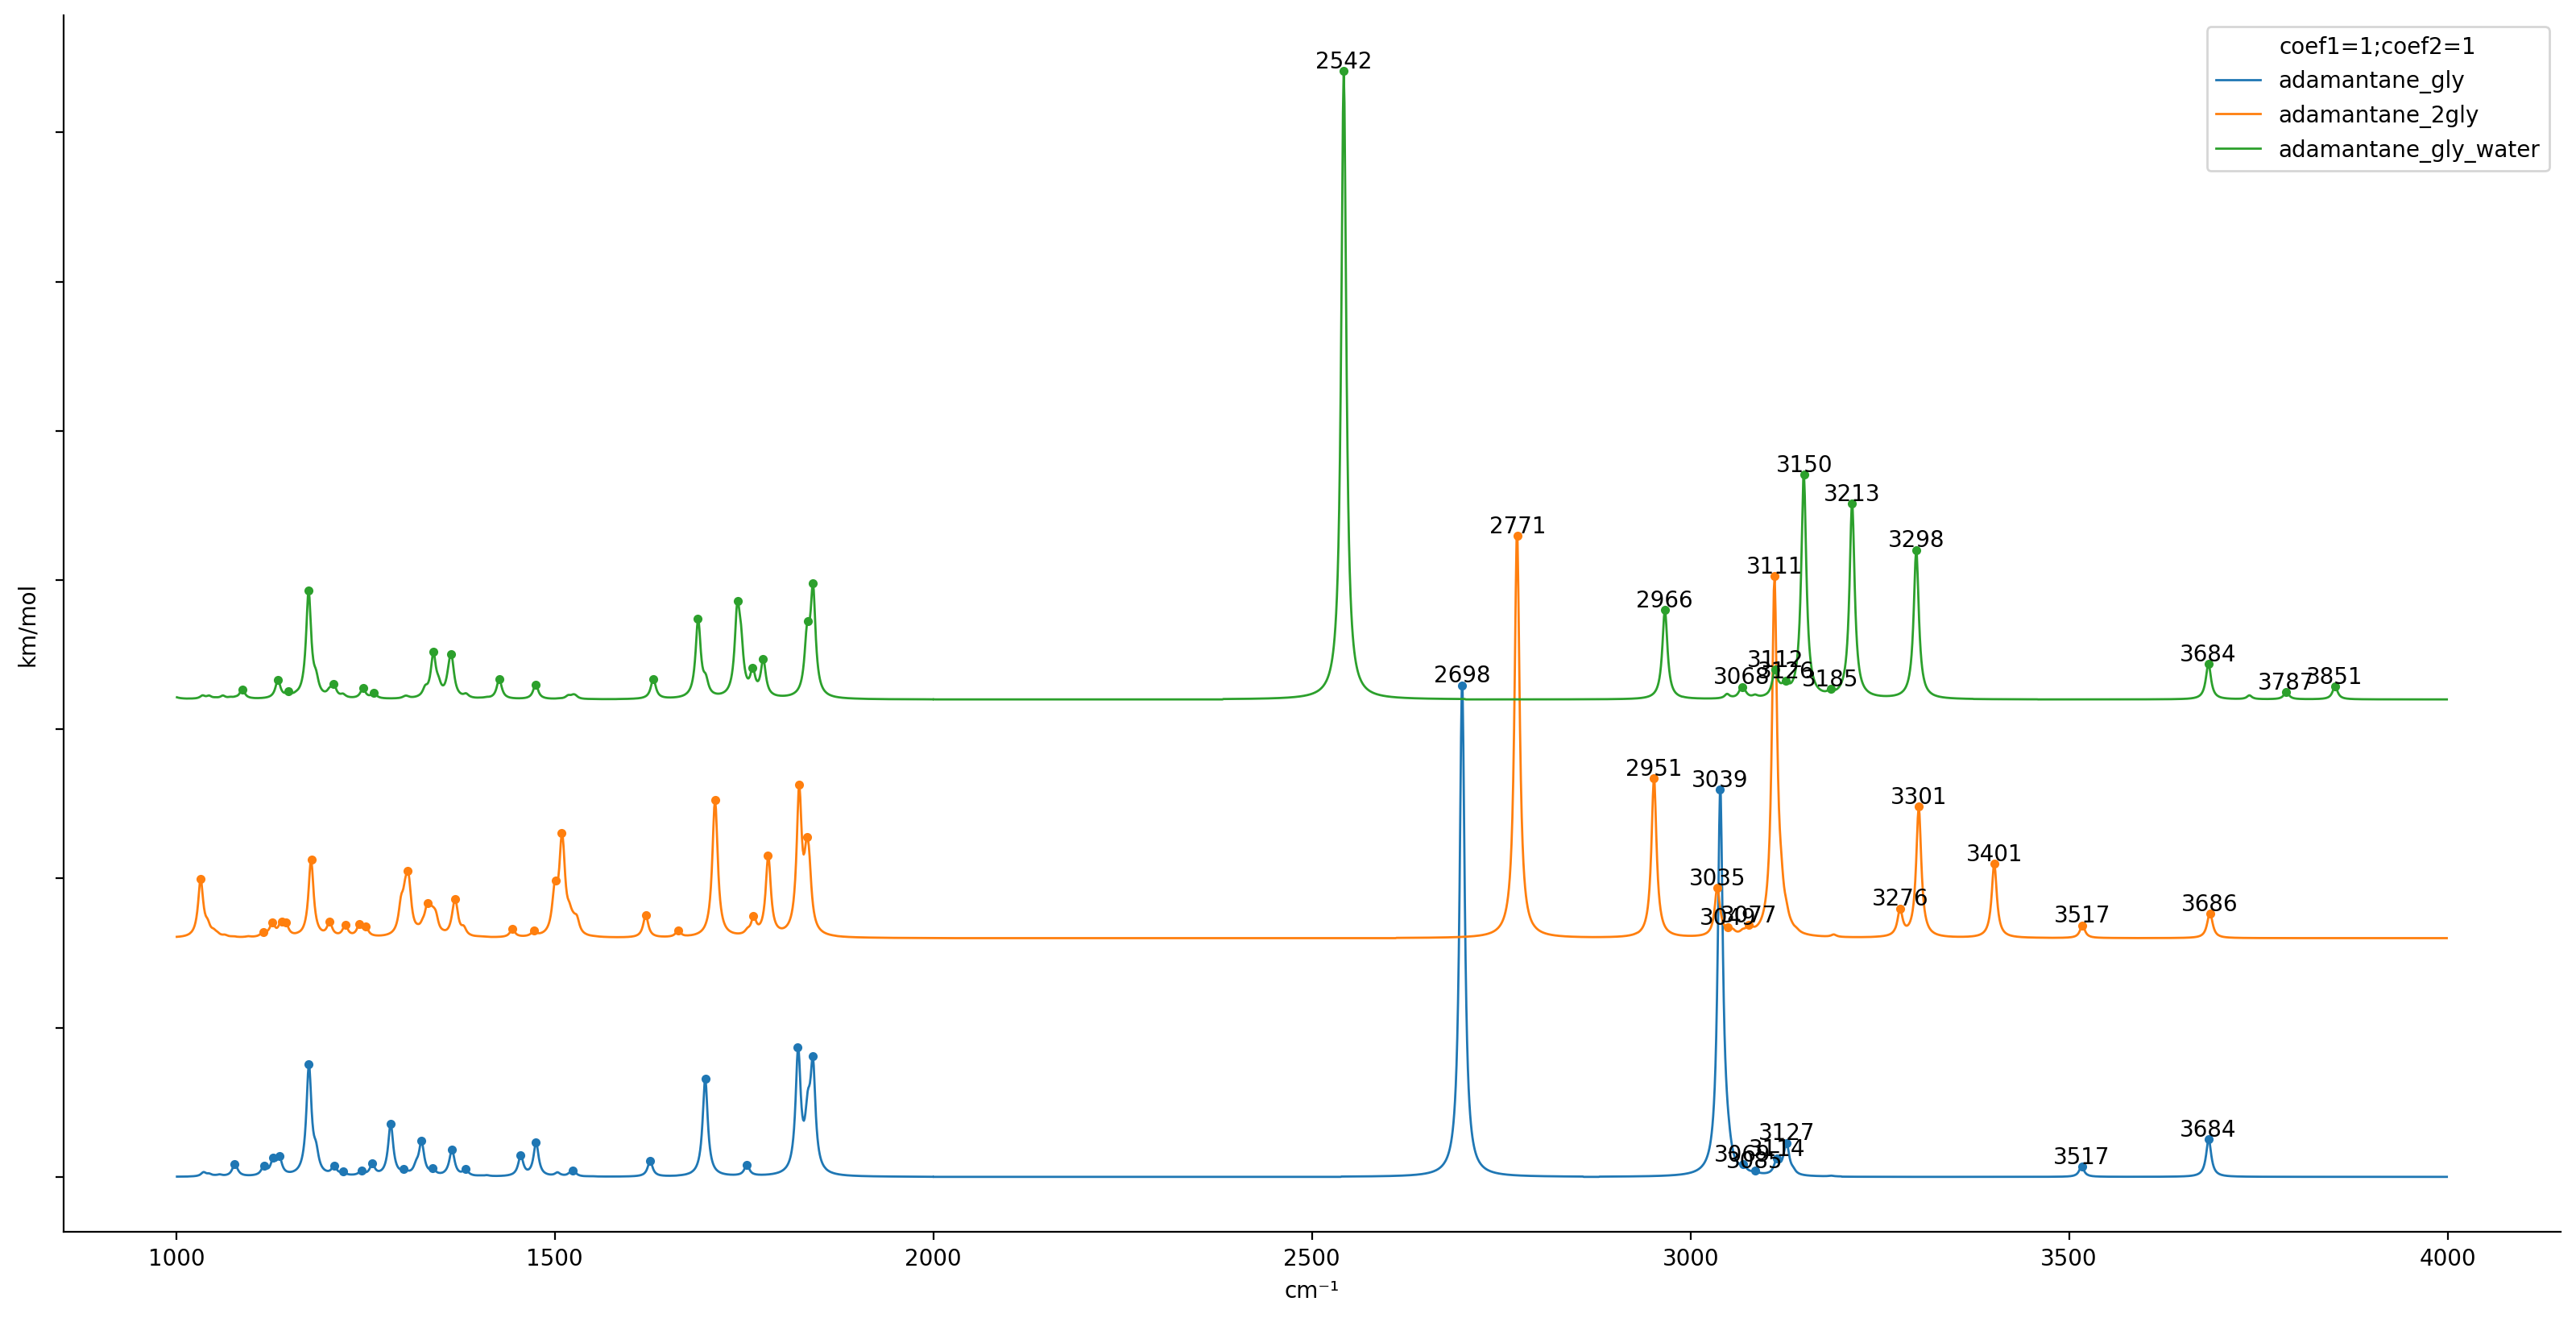

In [6]:
plot_all_ultra_short(\
    [adamantane_glycine_zw, adamantane_duo_glycine_zw, adamantane_glycine_zw_water],\
    ['adamantane_gly', 'adamantane_2gly','adamantane_gly_water'],\
    1, 1,\
    y_shift=4000,\
    showPeaks=True,\
    showXFrom=0, showXUpto=4000)

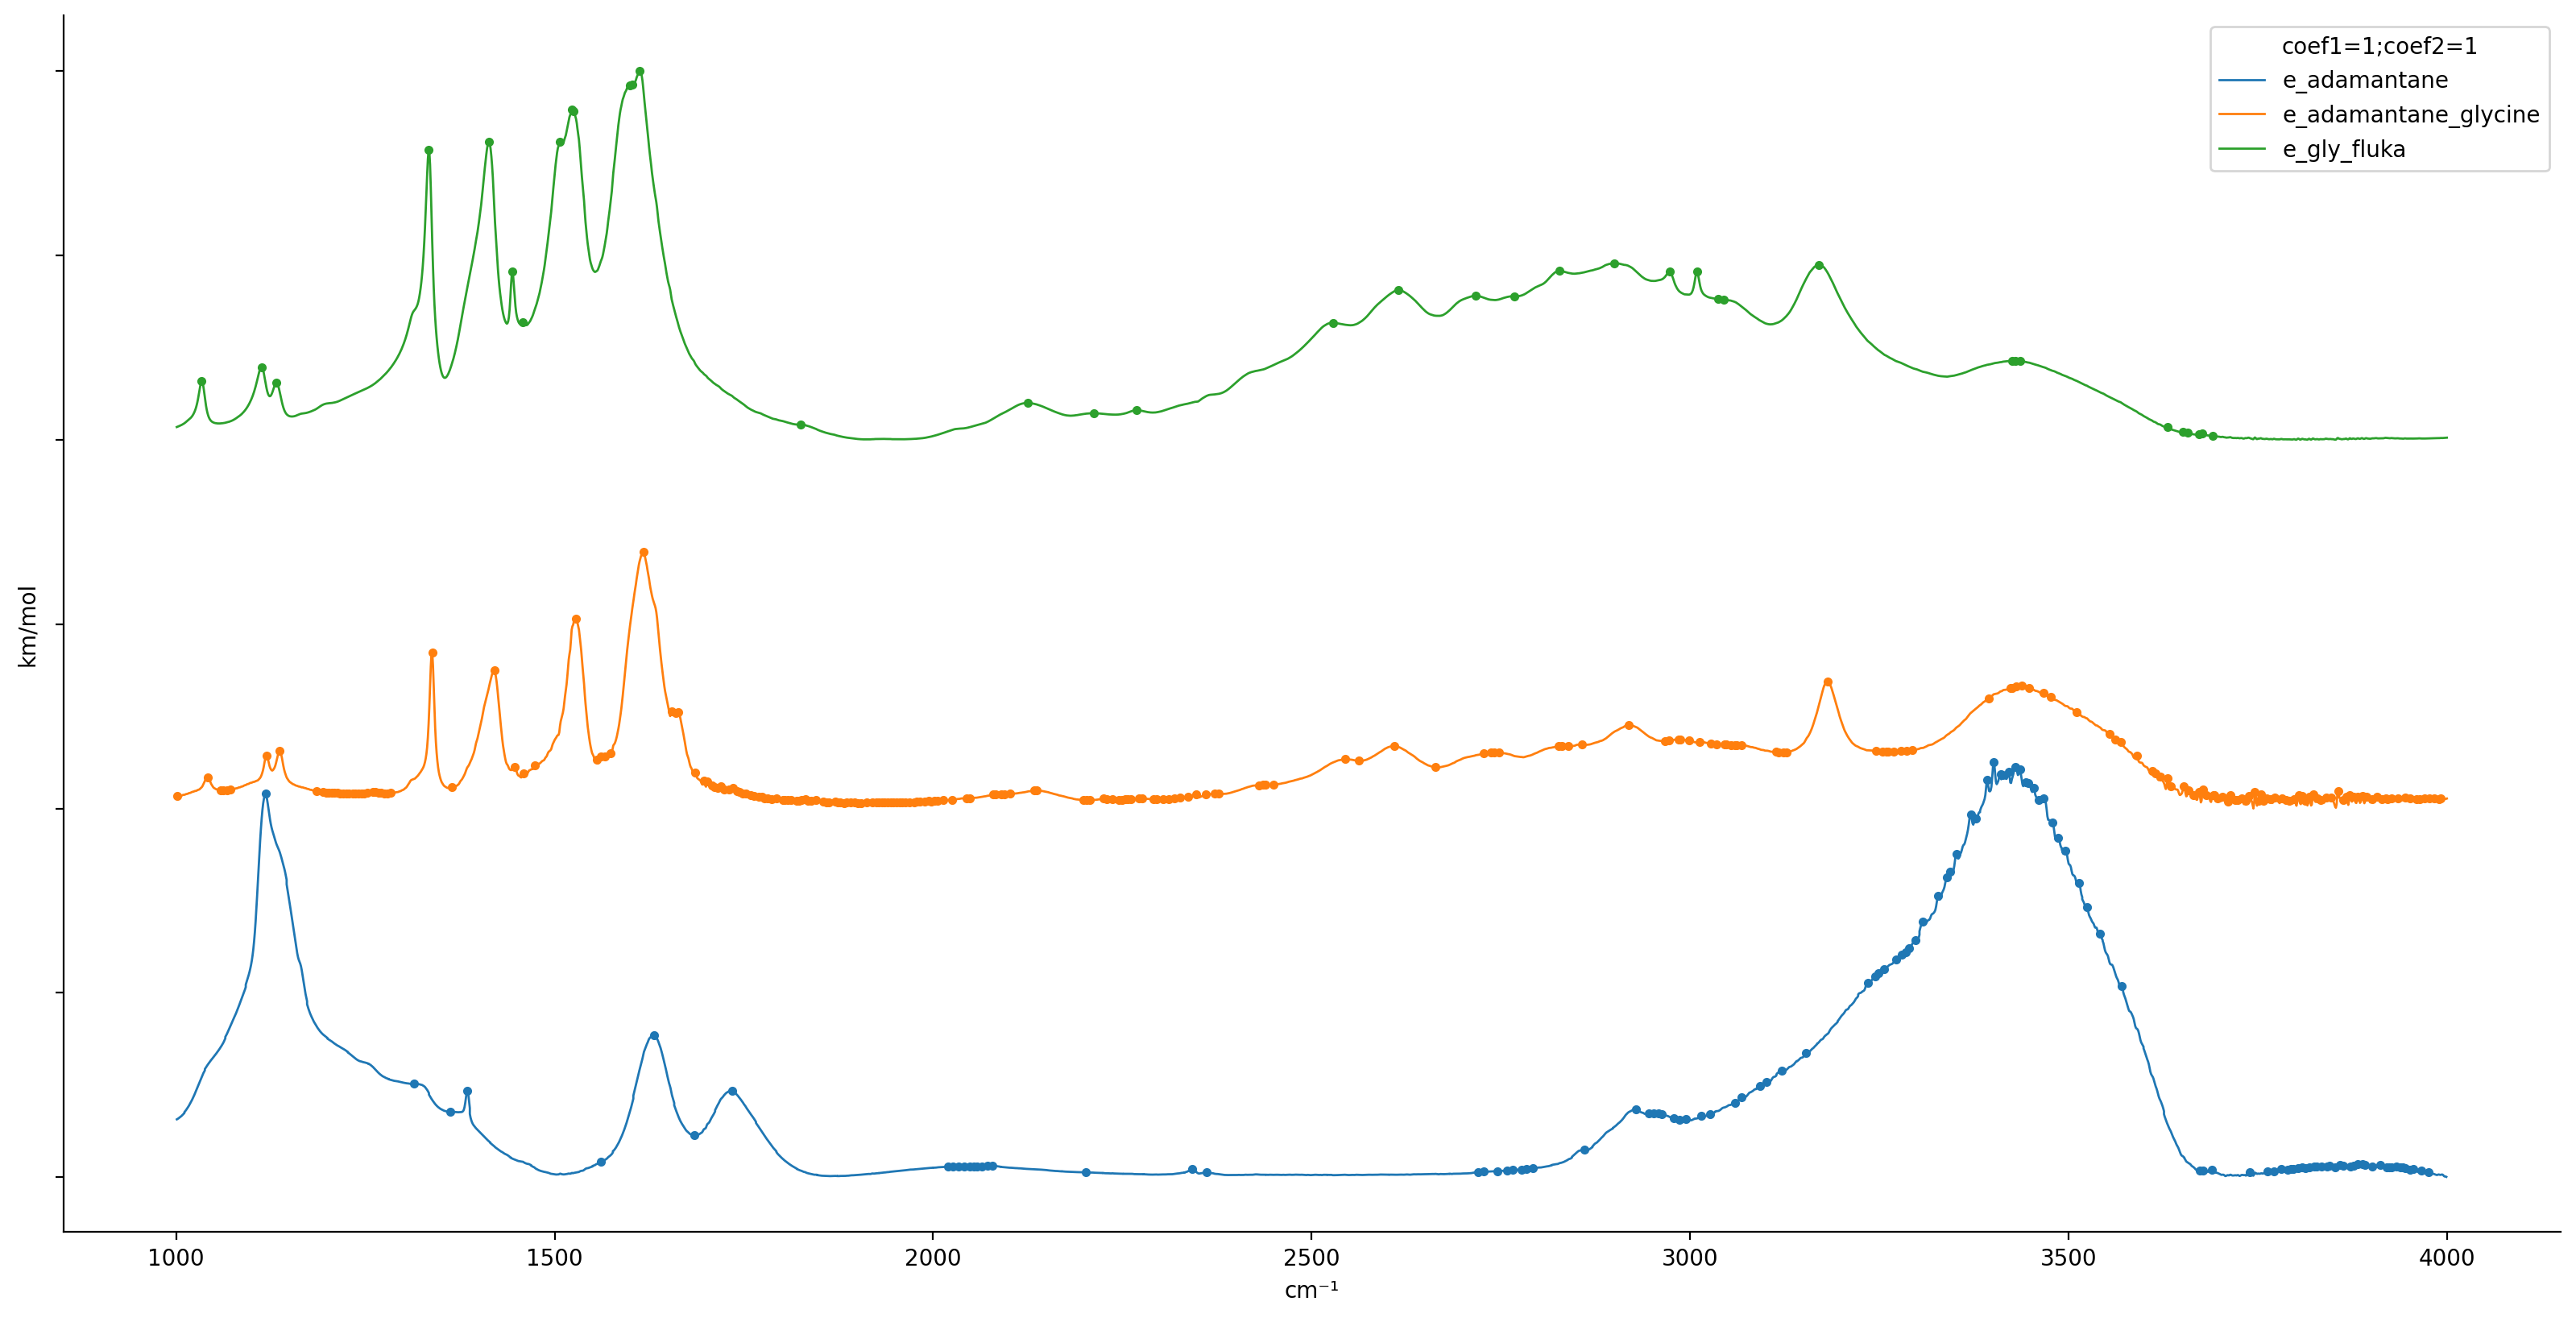

In [7]:
plot_all_ultra_short(\
    [e_adamantane, e_adamantane_glycine, e_gly_fluka],\
    ['e_adamantane', 'e_adamantane_glycine','e_gly_fluka'],\
    1, 1,\
    y_shift=1,\
    showPeaks=False, forcedFirstPeaks=False,\
    showXFrom=1000, showXUpto=4000)